# 텍스트 전처리(Text preprocessing)
: 1) 토큰화(Tokenization), 2) 정제(Cleansing) 및 정규화(Normalization), 3) 어간 추출(Stemming) 및 표제어 추출(Lemmatization), 4) 불용어(Stopword), 5) 정규 표현식(Regular Expression), 6) 정수 인코딩(integer Encoding), 7) 패딩(Padding), 8) 원-핫 인코딩(One-Hot Encoding) 9) 데이터의 분리(Splitting Data), 10) 한국어 전처리 패키지(Text Preprocesstin Tools for Korean Text)

## 토큰화(Tokenization)
: 주어진 코퍼스(corpus)에서 용도에 맞게 토큰(token)이라 불리는 단위로 분류하는 작업을 토큰화(tokenization)라고 합니다. 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다.

In [13]:
!pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 43.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.6/22.6 MB 37.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 24.8 MB/s eta 0:00:00
anceled
ERROR: Operation cancelled by user


In [5]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [6]:
print('단어 토큰화1: ', word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery hoes for a pastry shop."))

# word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인할 수 있습니다.

단어 토큰화1:  ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'hoes', 'for', 'a', 'pastry', 'shop', '.']


In [7]:
print('단어 토큰화2: ', WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery hoes for a pastry shop."))

# WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리한 것을 확인할 수 있습니다. 

단어 토큰화2:  ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'hoes', 'for', 'a', 'pastry', 'shop', '.']


In [8]:
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

# 케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 아포스트로피는 보존하는 것을 볼 수 있습니다.

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


## 3. 토큰화에서 고려해야할 사항
   
1) 구두점이나 특수 문자를 단순 제외해서는 안된다   
    : 갖고있는 코퍼스에서 단어들을 걸러낼 때, 구두점이나 특수 문자를 단순히 제외하는 것은 옳지 않습니다. 코퍼스에 대한 정제 작업을 진행하다보면, 구두점조차도 하나의 토큰으로 분류하기도 합니다. 가장 기본적인 예를 들어보자면, 마침표(.)와 같은 경우는 문장의 경계를 알 수 있는데 도움이 되므로 단어를 뽑아낼 때, 마침표(.)를 제외하지 않을 수 있습니다.    
    
    또 다른 예로 단어 자체에 구두점을 갖고 있는 경우도 있는데, m.p.h나 Ph.D나 AT&T 같은 경우가 있습니다. 또 특수 문자의 달러나 슬래시(/)로 예를 들어보면, $45.55와 같은 가격을 의미 하기도 하고, 01/02/06은 날짜를 의미하기도 합니다. 보통 이런 경우 45.55를 하나로 취급하고 45와 55로 따로 분류하고 싶지는 않을 수 있습니다.
    
    숫자 사이에 컴마(,)가 들어가는 경우도 있습니다. 보통 수치를 표현할 때는 123,456,789와 같이 세 자리 단위로 컴마가 있습니다.   
   
2) 줄임말과 단어 내에 띄어쓰기가 있는 경우   
    : 토큰화 작업에서 종종 영어권 언어의 아포스트로피(')는 압축된 단어를 다시 펼치는 역할을 하기도 합니다. 예를 들어 what're는 what are의 줄임말이며, we're는 we are의 줄임말입니다. 위의 예에서 re를 접어(clitic)이라고 합니다. 즉, 단어가 줄임말로 쓰일 때 생기는 형태를 말합니다. 가령 I am을 줄인 I'm이 있을 때, m을 접어라고 합니다.   
    
    New York이라는 단어나 rock 'n' roll이라는 단어를 봅시다. 이 단어들은 하나의 단어이지만 중간에 띄어쓰기가 존재합니다. 사용 용도에 따라서, 하나의 단어 사이에 띄어쓰기가 있는 경우에도 하나의 토큰으로 봐야하는 경우도 있을 수 있으므로, 토큰화 작업은 저러한 단어를 하나로 인식할 수 있는 능력도 가져야합니다.   

In [9]:
# 표준 토큰화 예제   
# : 이해를 돕기 위해 표준으로 쓰이고 있는 토큰화 방법 중 하나인 Penn Treebank Tokenization의 규칙에 대해서 소개하고, 토큰화의 결과를 확인해보겠습니다.

# 규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.
# 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.

from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

# 결과를 보면, 각각 규칙1과 규칙2에 따라서 home-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 does와 n't는 분리되었음을 볼 수 있습니다.

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


## 4. 문장 토큰화(Sentence Tokenization)

   이번에는 토큰의 단위가 문장(sentence)일 경우를 논의해보겠습니다. 이 작업은 갖고있는 코퍼스 내에서 문장 단위로 구분하는 작업으로 때로는 문장 분류(sentence segmentation)라고도 부릅니다. 보통 갖고있는 코퍼스가 정제되지 않은 상태라면, 코퍼스는 문장 단위로 구분되어 있지 않아서 이를 사용하고자 하는 용도에 맞게 문장 토큰화가 필요할 수 있습니다.

   !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 마침표는 그렇지 않기 때문입니다. 마침표는 문장의 끝이 아니더라도 등장할 수 있습니다.

   단순히 마침표(.)로 문장을 구분짓는다고 가정하면, 문장의 끝이 나오기 전에 이미 마침표가 여러번 등장하여 예상한 결과가 나오지 않게 됩니다.

   NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize를 지원하고 있습니다.

In [10]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."

print('문장 토큰화1 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [11]:
# 문장 중간에 마침표가 다수 등장하는 경우

text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))

# NLTK는 단순히 마침표를 구분자로 하여 문장을 구분하지 않았기 때문에, Ph.D.를 문장 내의 단어로 인식하여 성공적으로 인식하는 것을 볼 수 있습니다. 

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


한국어에 대한 문장 토큰화 도구 또한 존재합니다. 한국어의 경우에는 박상길님이 개발한 KSS(Korean Sentence Splitter)를 추천

In [12]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text))

ModuleNotFoundError: No module named 'kss'

## 5. 한국어에서의 토큰화의 어려움.

   영어는 New York과 같은 합성어나 he's 와 같이 줄임말에 대한 예외처리만 한다면, 띄어쓰기(whitespace)를 기준으로 하는 띄어쓰기 토큰화를 수행해도 단어 토큰화가 잘 작동합니다. 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지기 때문에 띄어쓰기 토큰화와 단어 토큰화가 거의 같기 때문입니다.   

   하지만 한국어는 영어와는 달리 띄어쓰기만으로는 토큰화를 하기에 부족합니다. 한국어의 경우에는 띄어쓰기 단위가 되는 단위를 '어절'이라고 하는데 어절 토큰화는 한국어 NLP에서 지양되고 있습니다. 어절 토큰화와 단어 토큰화는 같지 않기 때문입니다. 그 근본적인 이유는 한국어가 영어와는 다른 형태를 가지는 언어인 교착어라는 점에서 기인합니다. 교착어란 조사, 어미 등을 붙여서 말을 만드는 언어를 말합니다.

## 6. 품사 태깅(Part-of-speech tagging)

    단어는 표기는 같지만 품사에 따라서 단어의 의미가 달라지기도 합니다. 단어의 의미를 제대로 파악하기 위해서는 해당 단어가 어떤 품사로 쓰였는지 보는 것이 주요 지표가 될 수도 있습니다. 그에 따라 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해놓기도 하는데, 이 작업을 품사 태깅(part-of-speech tagging)이라고 합니다.

### NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습

In [40]:
# NLTK에서는 Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅합니다.


from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 :',tokenized_sentence)
print('품사 태깅 :',pos_tag(tokenized_sentence))

# Penn Treebank POG Tags에서 PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미합니다.

단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


한국어 자연어 처리를 위해서는 KoNLPy(코엔엘파이)라는 파이썬 패키지를 사용.   
코엔엘파이를 통해서 사용할 수 있는 형태소 분석기로 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)가 있습니다.   
한국어 NLP에서 형태소 분석기를 사용하여 단어 토큰화. 더 정확히는 형태소 토큰화(morpheme tokenization)를 수행해보겠습니다.

In [41]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

# 위 예제에서 형태소 추출과 품사 태깅 메소드의 결과를 보면 조사를 기본적으로 분리하고 있음을 확인할 수 있습니다.

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [42]:
# 꼬꼬마 형태소 분석기를 사용하여 같은 문장에 대해서 토큰화를 진행해봅시다.

print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

# 앞서 사용한 Okt 형태소 분석기와 결과가 다른 것을 볼 수 있습니다. 각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 예를 들어서 속도를 중시한다면 메캅을 사용할 수 있습니다.

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


## 정제 및 정규화
- 정제(Cleansing): 갖고 있는 코퍼스로부터 노이즈 데이터를 제거
- 정규화(Normalization): 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다. 

정제 작업은 토큰화 작업에 방해가 되는 부분들을 배제시키고 토큰화 작업을 수행하기 위해서 토큰화 작업보다 앞서 이루어지기도 하지만, 토큰화 작업 이후에도 여전히 남아있는 노이즈들을 제거하기위해 지속적으로 이루어지기도 합니다. 사실 완벽한 정제 작업은 어려운 편이라서, 대부분의 경우 이 정도면 됐다.라는 일종의 합의점을 찾기도 합니다.

### 1. 규칙에 기반한 표기가 다른 단어들의 통합

    필요에 따라 직접 코딩을 통해 정의할 수 있는 정규화 규칙의 예로서 같은 의미를 갖고있음에도, 표기가 다른 단어들을 하나의 단어로 정규화하 는 방법을 사용할 수 있습니다.

    가령, USA와 US는 같은 의미를 가지므로 하나의 단어로 정규화해볼 수 있습니다. uh-huh와 uhhuh는 형태는 다르지만 여전히 같은 의미를 갖고 있습니다. 이러한 정규화를 거치게 되면, US를 찾아도 USA도 함께 찾을 수 있을 것입니다. 뒤에서 표기가 다른 단어들을 통합하는 방법인 어간 추출(stemming)과 표제어 추출(lemmatizaiton)에 대해서 더 자세히 알아봅니다.

### 2. 대, 소문자 통합

    영어권 언어에서 대, 소문자를 통합하는 것은 단어의 개수를 줄일 수 있는 또 다른 정규화 방법입니다. 영어권 언어에서 대문자는 문장의 맨 앞 등과 같은 특정 상황에서만 쓰이고, 대부분의 글은 소문자로 작성되기 때문에 대, 소문자 통합 작업은 대부분 대문자를 소문자로 변환하는 소문자 변환작업으로 이루어지게 됩니다.

    물론 대문자와 소문자를 무작정 통합해서는 안 됩니다. 대문자와 소문자가 구분되어야 하는 경우도 있습니다. 가령 미국을 뜻하는 단어 US와 우리를 뜻하는 us는 구분되어야 합니다. 또 회사 이름(General Motors)나, 사람 이름(Bush) 등은 대문자로 유지되는 것이 옳습니다.

    모든 토큰을 소문자로 만드는 것이 문제를 가져온다면, 또 다른 대안은 일부만 소문자로 변환시키는 방법도 있습니다. 가령, 이런 규칙은 어떨까요? 문장의 맨 앞에서 나오는 단어의 대문자만 소문자로 바꾸고, 다른 단어들은 전부 대문자인 상태로 놔두는 것입니다.

    이러한 작업은 더 많은 변수를 사용해서 소문자 변환을 언제 사용할지 결정하는 머신 러닝 시퀀스 모델로 더 정확하게 진행시킬 수 있습니다. 하지만 만약 올바른 대문자 단어를 얻고 싶은 상황에서 훈련에 사용하는 코퍼스가 사용자들이 단어의 대문자, 소문자의 올바른 사용 방법과 상관없이 소문자를 사용하는 사람들로부터 나온 데이터라면 이러한 방법 또한 그다지 도움이 되지 않을 수 있습니다. 결국에는 예외 사항을 크게 고려하지 않고, 모든 코퍼스를 소문자로 바꾸는 것이 종종 더 실용적인 해결책이 되기도 합니다.

### 3. 불필요한 단어의 제거

    정제 작업에서 제거해야하는 노이즈 데이터(noise data)는 자연어가 아니면서 아무 의미도 갖지 않는 글자들(특수 문자 등)을 의미하기도 하지만, 분석하고자 하는 목적에 맞지 않는 불필요 단어들을 노이즈 데이터라고 하기도 합니다.

    불필요 단어들을 제거하는 방법으로는 '불용어 제거'와 '등장 빈도가 적은 단어 제거', '길이가 짧은 단어들을 제거'하는 방법이 있습니다. 불용어 제거는 불용어 챕터에서 더욱 자세히 다루기로 하고, 여기서는 등장 빈도가 적은 단어와 길이가 짧은 단어를 제거하는 경우에 대해서 간략히 설명하겠습니다.

    (1) 등장 빈도가 적은 단어
    때로는 텍스트 데이터에서 너무 적게 등장해서 자연어 처리에 도움이 되지 않는 단어들이 존재합니다. 예를 들어 입력된 메일이 정상 메일인지 스팸 메일인지를 분류하는 스팸 메일 분류기를 설계한다고 가정해보겠습니다. 총 100,000개의 메일을 가지고 정상 메일에서는 어떤 단어들이 주로 등장하고, 스팸 메일에서는 어떤 단어들이 주로 등장하는지를 가지고 설계하고자 합니다. 그런데 이때 100,000개의 메일 데이터에서 총 합 5번 밖에 등장하지 않은 단어가 있다면 이 단어는 직관적으로 분류에 거의 도움이 되지 않을 것임을 알 수 있습니다.

    (2) 길이가 짧은 단어
    영어권 언어에서는 길이가 짧은 단어를 삭제하는 것만으로도 어느정도 자연어 처리에서 크게 의미가 없는 단어들을 제거하는 효과를 볼 수 있다고 알려져 있습니다. 즉, 영어권 언어에서 길이가 짧은 단어들은 대부분 불용어에 해당됩니다. 사실 길이가 짧은 단어를 제거하는 2차 이유는 길이를 조건으로 텍스트를 삭제하면서 단어가 아닌 구두점들까지도 한꺼번에 제거하기 위함도 있습니다. 하지만 한국어에서는 길이가 짧은 단어라고 삭제하는 이런 방법이 크게 유효하지 않을 수 있는데 그 이유에 대해서 정리해보도록 하겠습니다.

    단정적으로 말할 수는 없지만, 영어 단어의 평균 길이는 6~7 정도이며, 한국어 단어의 평균 길이는 2~3 정도로 추정되고 있습니다. 두 나라의 단어 평균 길이가 몇 인지에 대해서는 확실히 말하기 어렵지만 그럼에도 확실한 사실은 영어 단어의 길이가 한국어 단어의 길이보다는 평균적으로 길다는 점입니다.

    이는 영어 단어와 한국어 단어에서 각 한 글자가 가진 의미의 크기가 다르다는 점에서 기인합니다. 한국어 단어는 한자어가 많고, 한 글자만으로도 이미 의미를 가진 경우가 많습니다. 예를 들어 '학교'라는 한국어 단어를 생각해보면, 배울 학(學)과 학교 교(校)로 글자 하나, 하나가 이미 함축적인 의미를 갖고있어 두 글자만으로 학교라는 단어를 표현합니다. 하지만 영어의 경우에는 학교라는 글자를 표현하기 위해서는 s, c, h, o, o, l이라는 총 6개의 글자가 필요합니다. 다른 예로는 전설 속 동물인 용(龍)을 표현하기 위해서는 한국어로는 한 글자면 충분하지만, 영어에서는 d, r, a, g, o, n이라는 총 6개의 글자가 필요합니다.

    이러한 특성으로 인해 영어는 길이가 2~3 이하인 단어를 제거하는 것만으로도 크게 의미를 갖지 못하는 단어를 줄이는 효과를 갖고있습니다. 예를 들어 갖고 있는 텍스트 데이터에서 길이가 1인 단어를 제거하는 코드를 수행하면 대부분의 자연어 처리에서 의미를 갖지 못하는 단어인 관사 'a'와 주어로 쓰이는 'I'가 제거됩니다. 마찬가지로 길이가 2인 단어를 제거한다고 하면 it, at, to, on, in, by 등과 같은 대부분 불용어에 해당되는 단어들이 제거됩니다. 필요에 따라서는 길이가 3인 단어도 제거할 수 있지만, 이 경우 fox, dog, car 등 길이가 3인 명사들이 제거 되기 시작하므로 사용하고자 하는 데이터에서 해당 방법을 사용해도 되는지에 대한 고민이 필요합니다.

In [43]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


### 4. 정규 표현식(Regular Expression)

    얻어낸 코퍼스에서 노이즈 데이터의 특징을 잡아낼 수 있다면, 정규 표현식을 통해서 이를 제거할 수 있는 경우가 많습니다. 가령, HTML 문서로부터 가져온 코퍼스라면 문서 여기저기에 HTML 태그가 있습니다. 뉴스 기사를 크롤링 했다면, 기사마다 게재 시간이 적혀져 있을 수 있습니다. 정규 표현식은 이러한 코퍼스 내에 계속해서 등장하는 글자들을 규칙에 기반하여 한 번에 제거하는 방식으로서 매우 유용합니다.

## 어간 추출 및 표제어 추출

    정규화 기법 중 코퍼스에 있는 단어의 개수를 줄일 수 있는 기법인 표제어 추출(lemmatization)과 어간 추출(stemming)의 개념에 대해서 알아봅니다. 또한 이 둘의 결과가 어떻게 다른지 이해합니다.

    이 두 작업이 갖고 있는 의미는 눈으로 봤을 때는 서로 다른 단어들이지만, 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화시켜서 문서 내의 단어 수를 줄이겠다는 것입니다. 이러한 방법들은 단어의 빈도수를 기반으로 문제를 풀고자 하는 BoW(Bag of Words) 표현을 사용하는 자연어 처리 문제에서 주로 사용됩니다. 자연어 처리에서 전처리, 더 정확히는 정규화의 지향점은 언제나 갖고 있는 코퍼스로부터 복잡성을 줄이는 일입니다.

### 1. 표제어 추출(Lemmatization)

    표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미를 갖습니다. 표제어 추출은 단어들로부터 표제어를 찾아가는 과정입니다. 표제어 추출은 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단합니다. 예를 들어서 am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 볼 수 있습니다. 이때, 이 단어들의 표제어는 be라고 합니다.

    표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것입니다. 형태소란 '의미를 가진 가장 작은 단위'를 뜻합니다. 그리고 형태학(morphology)이란 형태소로부터 단어들을 만들어가는 학문을 뜻합니다. 형태소의 종류로 어간(stem)과 접사(affix)가 존재합니다.

    1) 어간(stem)
    : 단어의 의미를 담고 있는 단어의 핵심 부분.

    2) 접사(affix)
    : 단어에 추가적인 의미를 주는 부분.

    형태학적 파싱은 이 두 가지 구성 요소를 분리하는 작업을 말합니다. 가령, cats라는 단어에 대해 형태학적 파싱을 수행한다면, 형태학적 파싱은 결과로 cat(어간)와 -s(접사)를 분리합니다. 꼭 두 가지로 분리되지 않는 경우도 있습니다. 단어 fox는 형태학적 파싱을 한다고 하더라도 더 이상 분리할 수 없습니다. fox는 독립적인 형태소이기 때문입니다. 이와 유사하게 cat 또한 더 이상 분리되지 않습니다.

In [44]:
# NLTK에서는 표제어 추출을 위한 도구인 WordNetLemmatizer를 지원

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])

# 표제어 추출은 뒤에서 언급할 어간 추출과는 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징이 있습니다. 하지만 그럼에도 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있습니다. 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문입니다.

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [46]:
# WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력한다.

print(lemmatizer.lemmatize('dies', 'v'))
print(lemmatizer.lemmatize('watched', 'v'))
print(lemmatizer.lemmatize('has', 'v'))

# 표제어 추출은 문맥을 고려하며 수행했을 때의 결과는 해당 단어의 품사 정보를 보존합니다. 하지만 어간 추출을 수행한 결과는 품사 정보가 보존되지 않습니다. 더 정확히는 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많습니다.

die
watch
have


### 2. 어간 추출(Stemming)

    어간(Stem)을 추출하는 작업을 어간 추출(stemming)이라고 합니다. 어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있습니다. 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있습니다. 예제를 보면 쉽게 이해할 수 있습니다. 어간 추출 알고리즘 중 하나인 포터 알고리즘(Porter Algorithm)에 아래의 문자열을 입력으로 넣는다고 해봅시다.

In [48]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."

tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

# 규칙 기반의 접근을 하고 있으므로 어간 추출 후의 결과에는 사전에 없는 단어들도 포함되어 있습니다. 

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


    어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택입니다. NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer) 알고리즘을 지원합니다. 

In [49]:
# 포터 알고리즘과 랭커스터 스태머 알고리즘으로 각각 어간 추출을 진행했을 때, 이 둘의 결과를 비교

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

# 이미 알려진 알고리즘을 사용할 때는, 사용하고자 하는 코퍼스에 스태머를 적용해보고 어떤 스태머가 해당 코퍼스에 적합한지를 판단한 후에 사용하여야 합니다.

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


    이런 규칙에 기반한 알고리즘은 종종 제대로 된 일반화를 수행하지 못 할 수 있습니다. 어간 추출을 하고나서 일반화가 지나치게 되거나, 또는 덜 되거나 하는 경우입니다. 

### 3. 한국어에서의 어간 추출

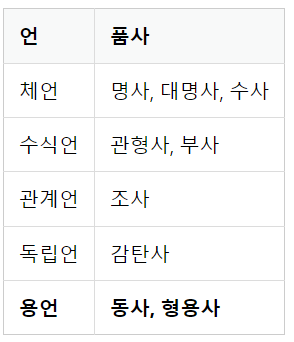

    이 중 용언에 해당되는 '동사'와 '형용사'는 어간(stem)과 어미(ending)의 결합으로 구성됩니다. 앞으로 용언이라고 언급하는 부분은 전부 동사와 형용사를 포함하여 언급하는 개념입니다.

    (1) 활용(conjugation)
    활용이란 용언의 어간(stem)이 어미(ending)를 가지는 일을 말합니다.

    어간(stem) : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).

    어미(ending): 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행

    활용은 어간이 어미를 취할 때, 어간의 모습이 일정하다면 규칙 활용, 어간이나 어미의 모습이 변하는 불규칙 활용으로 나뉩니다.

    (2) 규칙 활용
    규칙 활용은 어간이 어미를 취할 때, 어간의 모습이 일정합니다. 아래의 예제는 어간과 어미가 합쳐질 때, 어간의 형태가 바뀌지 않음을 보여줍니다.

    잡/어간 + 다/어미
    이 경우에는 어간이 어미가 붙기전의 모습과 어미가 붙은 후의 모습이 같으므로, 규칙 기반으로 어미를 단순히 분리해주면 어간 추출이 됩니다.

    (3) 불규칙 활용
    불규칙 활용은 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우를 말합니다.

    예를 들어 ‘듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ 등이 ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-’와 같이 어간의 형식이 달라지는 일이 있거나 ‘오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러’와 같이 일반적인 어미가 아닌 특수한 어미를 취하는 경우 불규칙활용을 하는 예에 속합니다.

    이 경우에는 어간이 어미가 붙는 과정에서 어간의 모습이 바뀌었으므로 단순한 분리만으로 어간 추출이 되지 않고 좀 더 복잡한 규칙을 필요로 합니다.

## 불용어(Stopword)

    갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요합니다. 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말합니다. 이러한 단어들을 불용어(stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있습니다.

    물론 불용어는 개발자가 직접 정의할 수도 있습니다. 이번에는 영어 문장에서 NLTK가 정의한 영어 불용어를 제거하는 실습을 하고, 한국어 문장에서 직접 정의한 불용어를 제거해보겠습니다.

In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

### 1. NLTK에서 불용어 확인하기



In [52]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

# stopwords.words("english")는 NLTK가 정의한 영어 불용어 리스트를 리턴합니다. 

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### 2. NLTK를 통해서 불용어 제거하기


In [54]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) # 불용어를 set로 형변환하는 이유는 뭘까?

word_tokens = word_tokenize(example)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

# 임의의 문장을 정의하고, NLTK의 word_tokenize를 통해서 단어 토큰화를 수행합니다. 그리고 단어 토큰화 결과로부터 NLTK가 정의하고 있는 불용어를 제외한 결과를 출력하고 있습니다. 결과적으로 'is', 'not', 'an'과 같은 단어들이 문장에서 제거되었음.

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


### 3. 한국어에서 불용어 제거하기

    한국어에서 불용어를 제거하는 방법으로는 간단하게는 '토큰화 후에 조사', '접속사 등을 제거'하는 방법이 있습니다. 하지만 불용어를 제거하려고 하다보면 조사나 접속사와 같은 단어들뿐만 아니라 명사, 형용사와 같은 단어들 중에서 불용어로서 제거하고 싶은 단어들이 생기기도 합니다. 결국에는 사용자가 직접 불용어 사전을 만들게 되는 경우가 많습니다. 이번에는 직접 불용어를 정의해보고, 주어진 문장으로부터 사용자가 정의한 불용어 사전으로부터 불용어를 제거해보겠습니다.

In [55]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


    아래의 링크는 보편적으로 선택할 수 있는 한국어 불용어 리스트를 보여줍니다. 하지만 여전히 절대적인 기준은 아닙니다.

    링크 : https://www.ranks.nl/stopwords/korean

    불용어가 많은 경우에는 코드 내에서 직접 정의하지 않고 txt 파일이나 csv 파일로 정리해놓고 이를 불러와서 사용하기도 합니다.

## 정규 표현식(Regular Expression)


    파이썬에서 지원하고 있는 '정규 표현식 모듈 re의 사용 방법'과 NLTK를 통한 '정규 표현식을 이용한 토큰화'에 대해서 알아봅니다.

### 1. 정규 표현식 문법과 모듈 함수

    1) 정규 표현식 문법
        
        . 	한 개의 임의의 문자를 나타냅니다. (줄바꿈 문자인 \n는 제외)
        ?	앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있습니다. (문자가 0개 또는 1개)
        *	앞의 문자가 무한개로 존재할 수도 있고, 존재하지 않을 수도 있습니다. (문자가 0개 이상)
        +	앞의 문자가 최소 한 개 이상 존재합니다. (문자가 1개 이상)
        ^	뒤의 문자열로 문자열이 시작됩니다.
        $	앞의 문자열로 문자열이 끝납니다.
        {숫자}	숫자만큼 반복합니다.
        {숫자1, 숫자2}	숫자1 이상 숫자2 이하만큼 반복합니다. ?, *, +를 이것으로 대체할 수 있습니다.
        {숫자,}	숫자 이상만큼 반복합니다.
        [ ]	대괄호 안의 문자들 중 한 개의 문자와 매치합니다. [amk]라고 한다면 a 또는 m 또는 k 중 하나라도 존재하면 매치를 의미합니다. [a-z]와 같이 범위를 지정할 수도 있습니다. [a-zA-Z]는 알파벳 전체를 의미하는 범위이며, 문자열에 알파벳이 존재하면 매치를 의미합니다.
        [^문자]	해당 문자를 제외한 문자를 매치합니다.
        l	AlB와 같이 쓰이며 A 또는 B의 의미를 가집니다.


    정규 표현식 문법에는 역 슬래쉬(\)를 이용하여 자주 쓰이는 문자 규칙들이 있습니다.

        \\\	역 슬래쉬 문자 자체를 의미합니다
        \\d	모든 숫자를 의미합니다. [0-9]와 의미가 동일합니다.
        \\D	숫자를 제외한 모든 문자를 의미합니다. [^0-9]와 의미가 동일합니다.
        \\s	공백을 의미합니다. [ \t\n\r\f\v]와 의미가 동일합니다.
        \\S	공백을 제외한 문자를 의미합니다. [^ \t\n\r\f\v]와 의미가 동일합니다.
        \\w	문자 또는 숫자를 의미합니다. [a-zA-Z0-9]와 의미가 동일합니다.
        \\W	문자 또는 숫자가 아닌 문자를 의미합니다. [^a-zA-Z0-9]와 의미가 동일합니다.

    2) 정규표현식 모듈 함수

        re.compile()	정규표현식을 컴파일하는 함수입니다. 다시 말해, 파이썬에게 전해주는 역할을 합니다. 찾고자 하는 패턴이 빈번한 경우에는 미리 컴파일해놓고 사용하면 속도와 편의성면에서 유리합니다.
        re.search()	문자열 전체에 대해서 정규표현식과 매치되는지를 검색합니다.
        re.match()	문자열의 처음이 정규표현식과 매치되는지를 검색합니다.
        re.split()	정규 표현식을 기준으로 문자열을 분리하여 리스트로 리턴합니다.
        re.findall()	문자열에서 정규 표현식과 매치되는 모든 경우의 문자열을 찾아서 리스트로 리턴합니다. 만약, 매치되는 문자열이 없다면 빈 리스트가 리턴됩니다.
        re.finditer()	문자열에서 정규 표현식과 매치되는 모든 경우의 문자열에 대한 이터레이터 객체를 리턴합니다.
        re.sub()	문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체합니다.

    앞으로 진행될 실습에서는 re.compile()에 정규 표현식을 컴파일하고, re.search()를 통해서 해당 정규 표현식이 입력 텍스트와 매치되는지를 확인하면서 각 정규 표현식에 대해서 이해해보겠습니다. re.search()는 매치된다면 Match Object를 리턴하고 매치되지 않으면 아무런 값도 출력되지 않습니다.